In [ ]:
!pip install tika

In [ ]:
# prompt: write code to list the total files in a directery

import os
def list_files(directory):
    """Lists all files in a given directory.

    Args:
        directory: The path to the directory.

    Returns:
        A list of file names in the directory.
    """
    try:
        files = os.listdir(directory)
        print(f"Total files in '{directory}': {len(files)}")
        return files
    except FileNotFoundError:
        print(f"Directory '{directory}' not found.")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []
# Example usage:
directory_path = "/content" # Replace with your directory path
file_list = list_files(directory_path)
filesname = []
if file_list:
    print("Files:")

    for file in file_list:
      print(file)
      filesname.append(file)



In [ ]:
filesname

In [ ]:
#!/usr/bin/env python
import tika
tika.initVM()
from tika import parser
import pandas as pd

df = pd.DataFrame(columns=['file_name', 'content'])

content = []
filename = []
for i in filesname[1:-1]:
  parsed = parser.from_file(i)
  filename.append(i)
  print(parsed["content"])
  content.append(parsed["content"])
  print("**************************************************************************")
  print("**************************************************************************")

df['file_name'] = filename
df['content'] = content

df.head()

# parsed = parser.from_file('/content/A Survey of Transformer-based.pdf')
# #print(parsed["metadata"])
# print(parsed["content"])

In [ ]:
df.head()

In [ ]:
df.content[1]

In [ ]:
# prompt: we need to tokenize this with sentence splits ans then with word tokenize

import nltk
nltk.download('punkt_tab')

nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

text = df.content[1]

# Sentence tokenization
sentences = sent_tokenize(text)
print("Sentences:")
sentence_df = []
sentence_sublist= []
for sentence in sentences:
    print(sentence)
    sentence_sublist.append(sentence)
    sentence_df.append(sentence)
word_df = []
words_sublist = []
# Word tokenization for each sentence
print("\nWord tokens per sentence:")
for sentence in sentences:
    words = word_tokenize(sentence)
    words_sublist.append( words)
word_df = words

In [ ]:
df['word_df'] = word_df
df['sentence_df'] = sentence_df

df.head()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Sample data (replace with your actual data)
data = {'text': ['This is a positive document.',
                 'Another positive example.',
                 'This document is negative.',
                 'A negative sentiment example.'],
        'label': [1, 1, 0, 0]}  # 1 for positive, 0 for negative
df = pd.DataFrame(data)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data (use the same vectorizer)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a classifier (Logistic Regression in this example)
#classifier = LogisticRegression()
classifier = GaussianNB()
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [ ]:
X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (1, 7)>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
documents = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "cats and dogs are animals",
    "cats and dogs are animals, animals are good for envirment, animals are eat grass, animals give milk are ",
    "cats and dogs are animals",
    "cats and dogs are animals",
    "cats and dogs are animals",
    "cats and dogs are animals",
    "cats and dogs are animals"
]

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF Representation:\n")
print(tfidf_df)


TF-IDF Representation:

        and   animals       are       cat      cats       dog      dogs  \
0  0.000000  0.000000  0.000000  0.399035  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.399035  0.000000   
2  0.447214  0.447214  0.447214  0.000000  0.447214  0.000000  0.447214   
3  0.122298  0.489191  0.489191  0.000000  0.122298  0.000000  0.122298   
4  0.447214  0.447214  0.447214  0.000000  0.447214  0.000000  0.447214   
5  0.447214  0.447214  0.447214  0.000000  0.447214  0.000000  0.447214   
6  0.447214  0.447214  0.447214  0.000000  0.447214  0.000000  0.447214   
7  0.447214  0.447214  0.447214  0.000000  0.447214  0.000000  0.447214   
8  0.447214  0.447214  0.447214  0.000000  0.447214  0.000000  0.447214   

        eat  envirment       for      give      good     grass       log  \
0  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.399035 

Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8



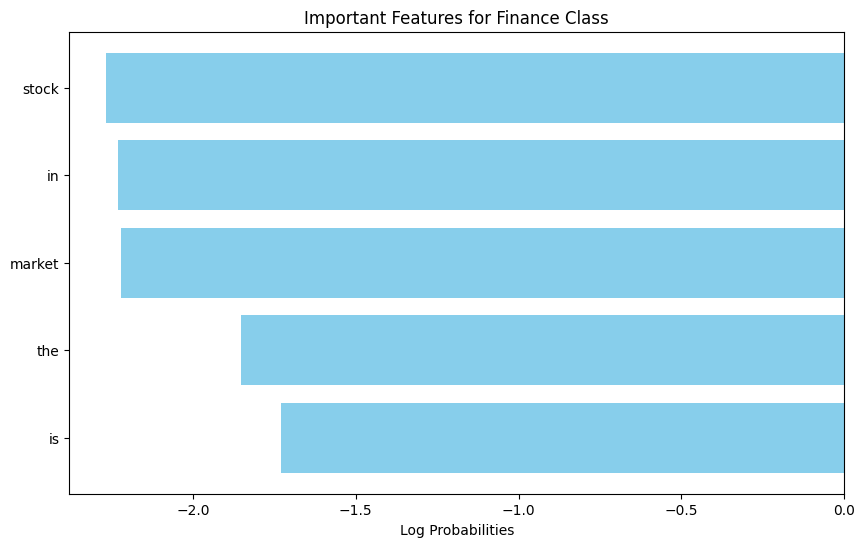

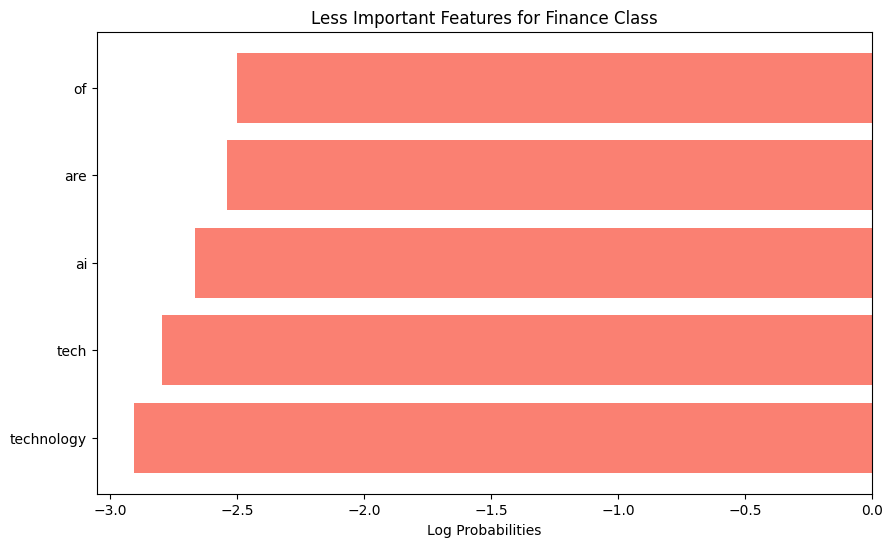

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Sample dataset creation (You can replace this with your dataset)
data = {
    'text': [
        "Stock prices have been soaring this week",
        "AI advancements are changing the tech industry",
        "The stock market crash was inevitable after recent trends",
        "The tech industry is booming, especially AI development",
        "Finance experts predict a stable economy in the coming years",
        "Investing in AI stocks has been profitable",
        "The Federal Reserve announced a new interest rate hike",
        "Technology companies are competing in AI-driven markets",
        "There is a new wave of innovation in financial technology",
        "The rise of tech giants is shaping the global economy",
        "Economic recovery is slow but steady",
        "The government plans to invest in technology startups",
        "Tech stocks are rising faster than ever",
        "AI models are becoming more accurate in prediction tasks",
        "Digital transformation is affecting traditional finance industries",
        "Cryptocurrency markets are fluctuating wildly",
        "Smartphones are getting smarter with AI integration",
        "Interest rates have a significant impact on the stock market",
        "Artificial intelligence is changing the way we work",
        "The future of the stock market lies in technology investments",
        "Fintech companies are transforming the financial landscape",
        "Cloud computing is an essential part of modern tech infrastructure",
        "Tech companies are becoming the most valuable in the world",
        "Stock market analysts are predicting growth in tech investments",
        "The financial sector is adopting more technology for automation",
        "Artificial intelligence is a game-changer for healthcare"
    ],
    'label': [
        'finance', 'tech', 'finance', 'tech', 'finance', 'finance', 'finance', 'tech', 'finance', 'tech',
        'finance', 'tech', 'tech', 'tech', 'finance', 'finance', 'tech', 'finance', 'tech', 'finance',
        'tech', 'finance', 'tech', 'tech', 'finance', 'finance'
    ]
}


# Convert data into DataFrame
df = pd.DataFrame(data)

# Step 2: Preprocess the data
# Convert labels to numerical values
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Step 3: Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10)  # limit to top 10 features
X = tfidf_vectorizer.fit_transform(df['text'])
y = df['label']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train a classification model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Get the feature importance (TF-IDF weights) from the trained model
# Get the feature names (words)
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Get the log-probabilities of each feature for each class
log_probabilities = model.feature_log_prob_

# Step 8: Visualize the important features for the 'finance' class
class_label = 'finance'
class_idx = le.transform([class_label])[0]

# Get the top features for the 'finance' class (most positive log-probabilities)
top_features_idx = log_probabilities[class_idx].argsort()[-5:][::-1]  # top 5 important features
top_features = feature_names[top_features_idx]
top_features_coeff = log_probabilities[class_idx][top_features_idx]

# Plot the most important features for the 'finance' class
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_features_coeff, color='skyblue')
plt.xlabel('Log Probabilities')
plt.title(f'Important Features for {class_label.capitalize()} Class')
plt.show()

# Step 9: Visualize less important features
# Get the least important features for the 'finance' class
least_features_idx = log_probabilities[class_idx].argsort()[:5]  # least 5 important features
least_features = feature_names[least_features_idx]
least_features_coeff = log_probabilities[class_idx][least_features_idx]

# Plot the least important features for the 'finance' class
plt.figure(figsize=(10, 6))
plt.barh(least_features, least_features_coeff, color='salmon')
plt.xlabel('Log Probabilities')
plt.title(f'Less Important Features for {class_label.capitalize()} Class')
plt.show()
